### Multi Spacecraft Plot
This tool downloads SEP intensity-time series data from various different spacecraft and and visualizes these in one plot.

The tool also provides a comprehensive table summarizing the various available energy channels of the different instruments to help selecting comparable energy channels.

At the bottom the tool shows a spacecraft-constellation plot (Solar-MACH) and a table summarizing the spacecraft coordinates for the selected time interval 


### Saving figures

You can usually save a figure from the Notebook by right-clicking on it while holding down the ⇧ Shift key, then select "Save Image As..." (or similar).

In [ ]:
from multi_sc_plots import Event
from multi_inst_plots.other_tools import copy_fig_axs
from seppy.util import jupyterhub_data_path
import datetime as dt
import numpy as np
import os
import pandas as pd

In [ ]:
# initialize Event object and open instrument selection
E = Event()
instruments = E.instrument_selection()

GridspecLayout(children=(HTML(value='<b>Electrons:</b>', layout=Layout(grid_area='widget001')), HTML(value='<b…

In [ ]:
# define period for data loading (understands most formats)
startdate = dt.datetime(2023, 5, 9, 12, 0)
enddate = "2023/05/10 22:00:00"

In [ ]:
# optional: manually change some parameters before loading

# E.psp_epilo_channel = 'F'

In [ ]:
# show default viewing/sector of instruments

display(E.viewing)

{'BepiColombo/SIXS': 0,
 'Parker Solar Probe/EPI-Hi HET': 'A',
 'Parker Solar Probe/EPI-Lo PE': 3,
 'Solar Orbiter/EPT': 'sun',
 'Solar Orbiter/HET': 'sun',
 'STEREO-A/SEPT': 'sun'}

In [ ]:
# optional: overwrite viewing/sector for specific instruments ('asun' meaning 'anti-sun')

E.viewing['BepiColombo/SIXS'] = 0
E.viewing['Parker Solar Probe/EPI-Hi HET'] = 'A'  # 'A'='sun', 'B'='asun'
E.viewing['Parker Solar Probe/EPI-Lo PE'] = 3  # 3='sun', 7='asun'
E.viewing['Solar Orbiter/EPT'] = 'sun'  # 'asun', 'sun', 'north', 'south'
E.viewing['Solar Orbiter/HET'] = 'sun'  # 'asun', 'sun', 'north', 'south'
E.viewing['STEREO-A/SEPT'] = 'sun'  # 'asun', 'sun', 'north', 'south'

In [ ]:
# Set your local path where you want to save the data files. If run on the project's JupyterHub server, set it to a common data folder. 
data_path = f"{os.getcwd()}{os.sep}data"
data_path = jupyterhub_data_path(data_path)

# Load the data
E.load_data(startdate, enddate, instruments, data_path=data_path)

NOTE: SOHO/EPHIN proton and helium data are not supported at the moment and set to negative values of -9e9!


In [ ]:
# display table with energy channels for loaded datasets (click left of table to expand it)
E.print_energies()

Electron channels:


,BepiColombo/SIXS e,Parker Solar Probe/EPI-Hi HET e,Parker Solar Probe/EPI-Lo PE e,SOHO/EPHIN e,Solar Orbiter/EPT e,Solar Orbiter/HET e,STEREO-A/HET e,STEREO-A/SEPT e,WIND/3DP e
channel,,,,,,,,,
0,NaN,0.4 - 0.5 MeV,10.00 - 34.99 keV,0.25 - 0.7 MeV,0.0356 - 0.042 MeV,0.4533 - 1.0380 MeV,0.7-1.4 MeV,NaN,18.9 - 35.09 keV
1,71 keV,0.5 - 0.6 MeV,34.99 - 43.22 keV,deactivated bc. of failure mode D,0.0408 - 0.0467 MeV,1.0530 - 2.4010 MeV,1.4-2.8 MeV,NaN,28.1 - 52.18 keV
2,106 keV,0.6 - 0.7 MeV,43.22 - 53.35 keV,0.67 - 10.4 MeV,0.0467 - 0.0542 MeV,2.4010 - 5.9930 MeV,2.8-4.0 MeV,45.0-55.0 keV,46.32 - 86.02 keV
3,169 keV,0.7 - 0.8 MeV,53.35 - 65.91 keV,4.80 - 10.4 MeV,0.0542 - 0.0635 MeV,5.9930 - 18.8300 MeV,NaN,55.0-65.0 keV,75.91 - 140.97 keV
4,278 keV,0.8 - 1.0 MeV,65.91 - 100.50 keV,NaN,0.0635 - 0.0739 MeV,NaN,NaN,65.0-75.0 keV,127.25 - 236.32 keV
5,918 keV,1.0 - 1.2 MeV,100.50 - 153.50 keV,NaN,0.0739 - 0.0866 MeV,NaN,NaN,75.0-85.0 keV,216.66 - 402.36 keV
6,2.12 MeV,1.2 - 1.4 MeV,153.50 - 234.40 keV,NaN,0.0866 - 0.1021 MeV,NaN,NaN,85.0-105.0 keV,361.78 - 671.87 keV
7,7.01 MeV,1.4 - 1.7 MeV,234.40 - 357.60 keV,NaN,0.1021 - 0.1207 MeV,NaN,NaN,105.0-125.0 keV,NaN
8,NaN,1.7 - 2.0 MeV,357.60 - 832.30 keV,NaN,0.1207 - 0.1432 MeV,NaN,NaN,125.0-145.0 keV,NaN



Proton/ion channels:


,BepiColombo/SIXS p,Parker Solar Probe/EPI-Hi HET p,SOHO/ERNE-HED p,Solar Orbiter/EPT p,Solar Orbiter/HET p,STEREO-A/HET p,STEREO-A/SEPT p,WIND/3DP p
channel,,,,,,,,
0,NaN,6.7 - 8.0 MeV,13-16 MeV,0.0552 - 0.0651 MeV,7.0450 - 7.3540 MeV,13.6-15.1 MeV,NaN,51.71 - 96.03 keV
1,1.1 MeV,8.0 - 9.5 MeV,16-20 MeV,0.0608 - 0.0718 MeV,7.3540 - 7.8900 MeV,14.9-17.1 MeV,NaN,89.74 - 166.66 keV
2,1.2 MeV,9.5 - 11.3 MeV,20-25 MeV,0.0689 - 0.0798 MeV,7.8900 - 8.4840 MeV,17.0-19.3 MeV,84.1-92.7 keV,137.62 - 255.58 keV
3,1.5 MeV,11.3 - 13.5 MeV,25-32 MeV,0.0768 - 0.087 MeV,8.4840 - 9.1840 MeV,20.8-23.8 MeV,92.7-101.3 keV,233.39 - 433.44 keV
4,2.3 MeV,13.5 - 16.0 MeV,32-40 MeV,0.087 - 0.0974 MeV,9.1840 - 9.6410 MeV,23.8-26.4 MeV,101.3-110.0 keV,386.66 - 718.09 keV
5,3.9 MeV,16.0 - 19.0 MeV,40-50 MeV,0.0974 - 0.1096 MeV,10.6000 - 10.7400 MeV,26.3-29.7 MeV,110.0-118.6 keV,712.59 - 1323.38 keV
6,8.0 MeV,19.0 - 22.6 MeV,50-64 MeV,0.1096 - 0.1246 MeV,10.7400 - 10.9800 MeV,29.5-33.4 MeV,118.6-137.0 keV,1451.67 - 2695.97 keV
7,14.3 MeV,22.6 - 26.9 MeV,64-80 MeV,0.1246 - 0.1419 MeV,10.9800 - 11.3500 MeV,33.4-35.8 MeV,137.0-155.8 keV,3107.7 - 5771.44 keV
8,25.4 MeV,26.9 - 32.0 MeV,80-100 MeV,0.1419 - 0.1628 MeV,11.3500 - 11.8000 MeV,35.5-40.5 MeV,155.8-174.6 keV,4728.47 - 8781.44 keV


In [ ]:
# select electron energy channels to be used (note: if the data has not beed loaded above, selecting the channel here won't have any effect!)

E.channels_e['BepiColombo/SIXS e'] = 2  # channel combination not supported!
E.channels_e['Parker Solar Probe/EPI-Hi HET e'] = [3, 10]
E.channels_e['Parker Solar Probe/EPI-Lo PE e'] = [4, 5]
E.channels_e['SOHO/EPHIN e'] = 2  # channel combination not supported!
E.channels_e['Solar Orbiter/EPT e'] = [6, 7] # L2: [14, 18]
E.channels_e['Solar Orbiter/HET e'] = [0, 1]
E.channels_e['STEREO-A/HET e'] = [0, 1]
E.channels_e['STEREO-A/SEPT e'] = [6, 7]
E.channels_e['WIND/3DP e'] = 3  # channel combination not supported!

In [ ]:
# select proton/ion energy channels to be used (note: if the data has not beed loaded above, selecting the channel here won't have any effect!)

E.channels_p['BepiColombo/SIXS p'] = 8  # channel combination not supported!
E.channels_p['Parker Solar Probe/EPI-Hi HET p'] = [8, 9]
E.channels_p['SOHO/ERNE-HED p'] = [3, 4]
E.channels_p['Solar Orbiter/EPT p'] = [20, 21] # L2: [50, 56]
E.channels_p['Solar Orbiter/HET p'] = [19, 24]
E.channels_p['STEREO-A/HET p'] = [5, 8]
E.channels_p['STEREO-A/SEPT p'] = [25, 30]
E.channels_p['WIND/3DP p'] = 6  # channel combination not supported!

In [ ]:
# show default plot colors per spacecraft/instrument
display(E.plot_colors)

{'BepiColombo/SIXS': 'orange',
 'Parker Solar Probe/EPI-Hi HET': 'blueviolet',
 'Parker Solar Probe/EPI-Lo PE': 'blueviolet',
 'SOHO/EPHIN': 'k',
 'SOHO/ERNE-HED': 'k',
 'Solar Orbiter/EPT': '#56B4E9',
 'Solar Orbiter/HET': '#0072B2',
 'STEREO-A/HET': 'orangered',
 'STEREO-A/SEPT': 'orangered',
 'WIND/3DP': 'dimgrey'}

In [ ]:
# change plot color per spacecraft/instrument (re-initialize the Event object to reset)
E.plot_colors['Parker Solar Probe/EPI-Hi HET'] = 'blueviolet'

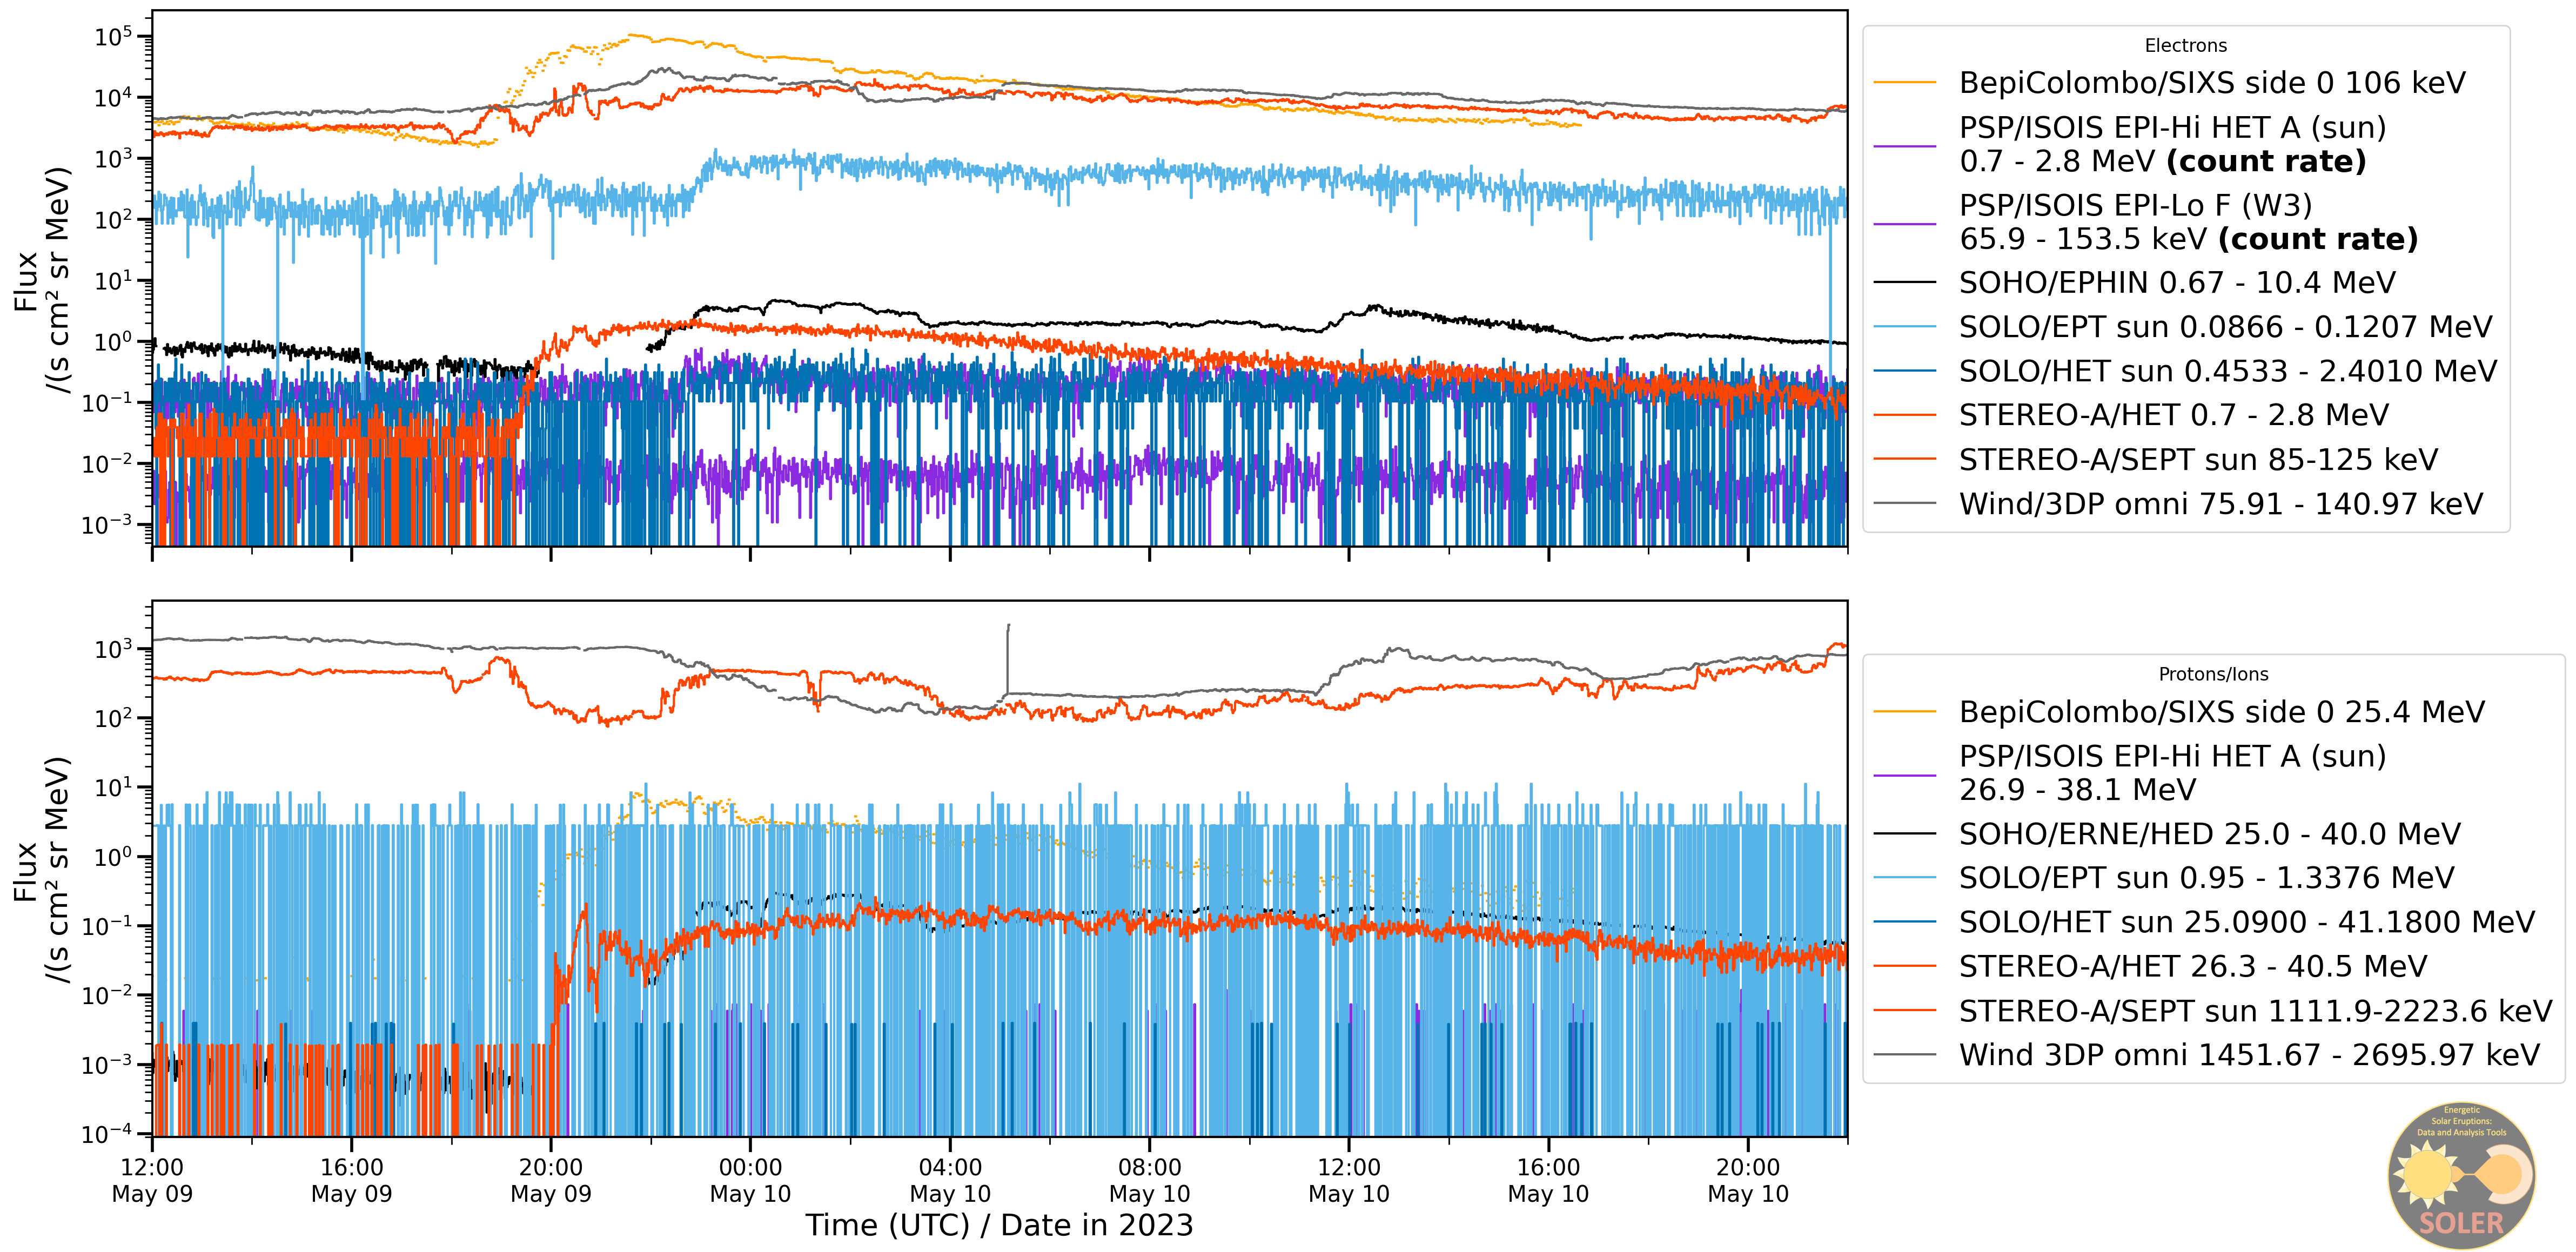

In [ ]:
# plot loaded data. optionally adjust time of plot.
fig, axes = E.plot(averaging='1min', dict_plot_instruments=instruments)

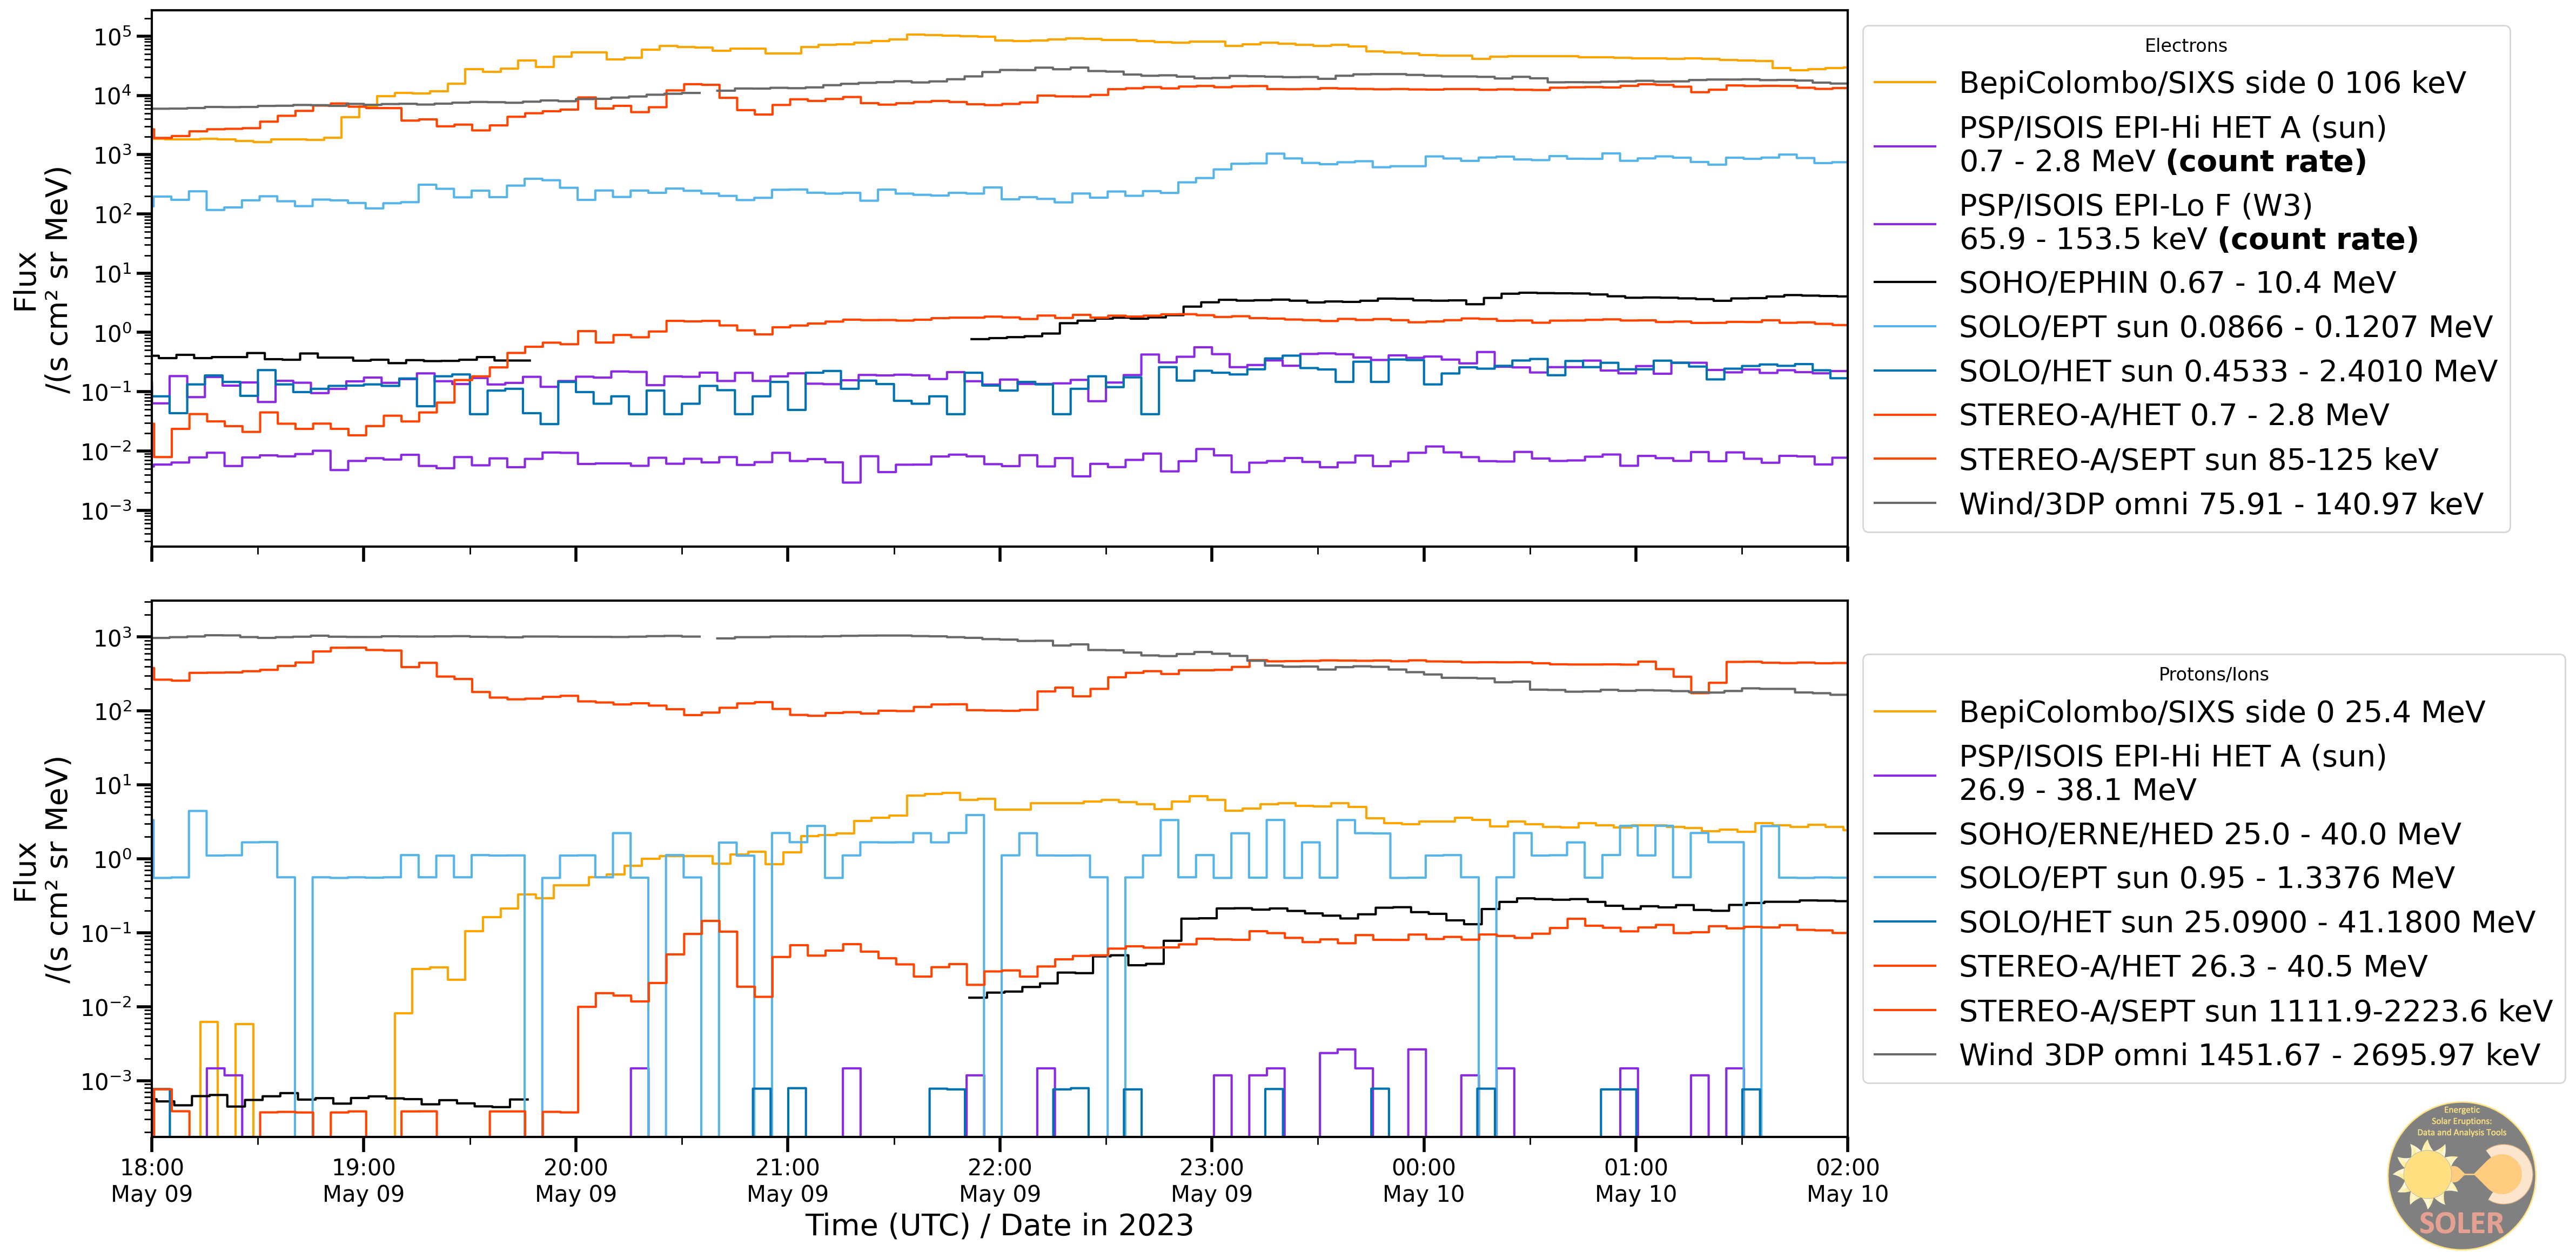

In [ ]:
# adjust averaging, plot range, updated instruments to plot from widget above:
fig, axes = E.plot(averaging='5min', plot_range=[dt.datetime(2023, 5, 9, 18, 0), dt.datetime(2023, 5, 10, 2, 0)], dict_plot_instruments=instruments)

---

## Edit the figure
For example, add a vertical line at a given datetime or a red-shaded region in the 2nd panel.

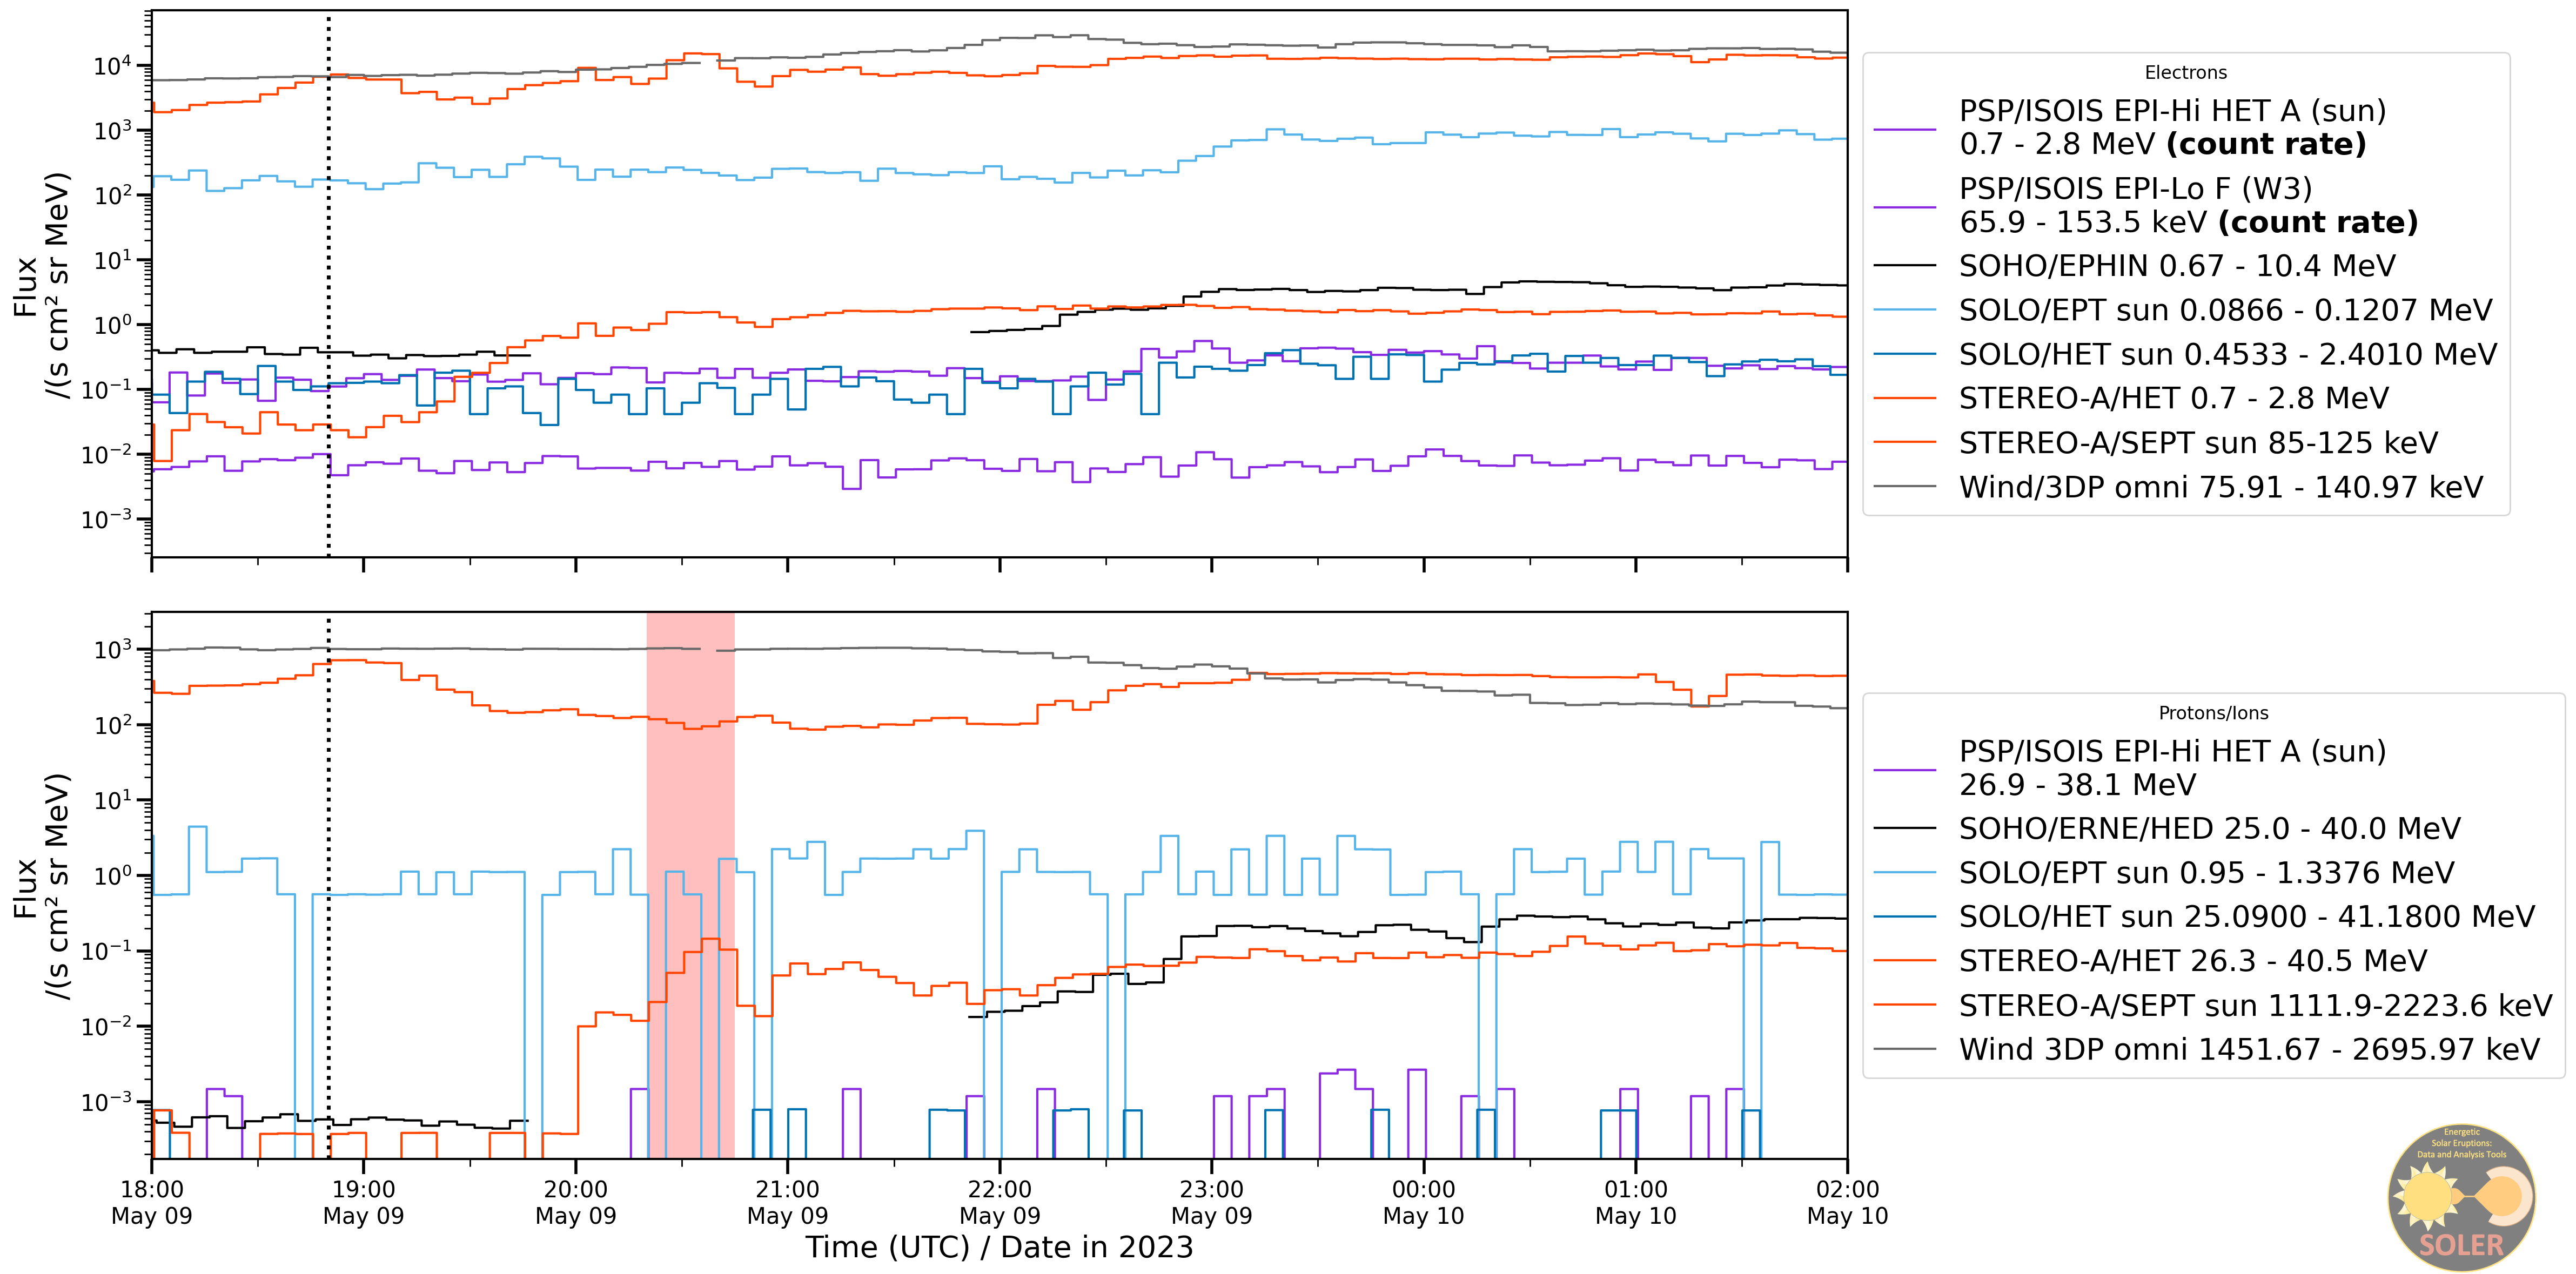

In [ ]:
# make a copy of the figure; don't change
fig_copy, axs_copy = copy_fig_axs(fig)

# vertical line 
time_vline = dt.datetime(2023, 5, 9, 18, 50)  # time format is YYYY, MM, DD, HH, SS
for ax in axs_copy:
    ax.axvline(time_vline, 
               linestyle=":",  # available line styles are '-', '--', '-.', ':'
               linewidth=2.5,
               color="black")

# shaded region in 2nd panel (counting starts with 0)
cell_shade = 1
starttime_shade = dt.datetime(2023, 5, 9, 20, 20)
endtime_shade = dt.datetime(2023, 5, 9, 20, 45)
axs_copy[cell_shade].axvspan(starttime_shade, 
                             endtime_shade,
                             alpha=0.25,  # alpha value of the shading from 0.0 to 1.0 
                             facecolor="red", 
                             edgecolor=None,  # color of boundary lines
                             linestyle="-")  # linestyle only effective if edgecolor is defined  

# show updated figure; don't change
fig_copy

---

## Obtain SolarMACH plot

In [ ]:
from solarmach import SolarMACH

In [ ]:
# spacecraft list defined above
print(E.spacecraft)

['Parker Solar Probe', 'SOHO', 'STEREO-A', 'Solar Orbiter', 'WIND']


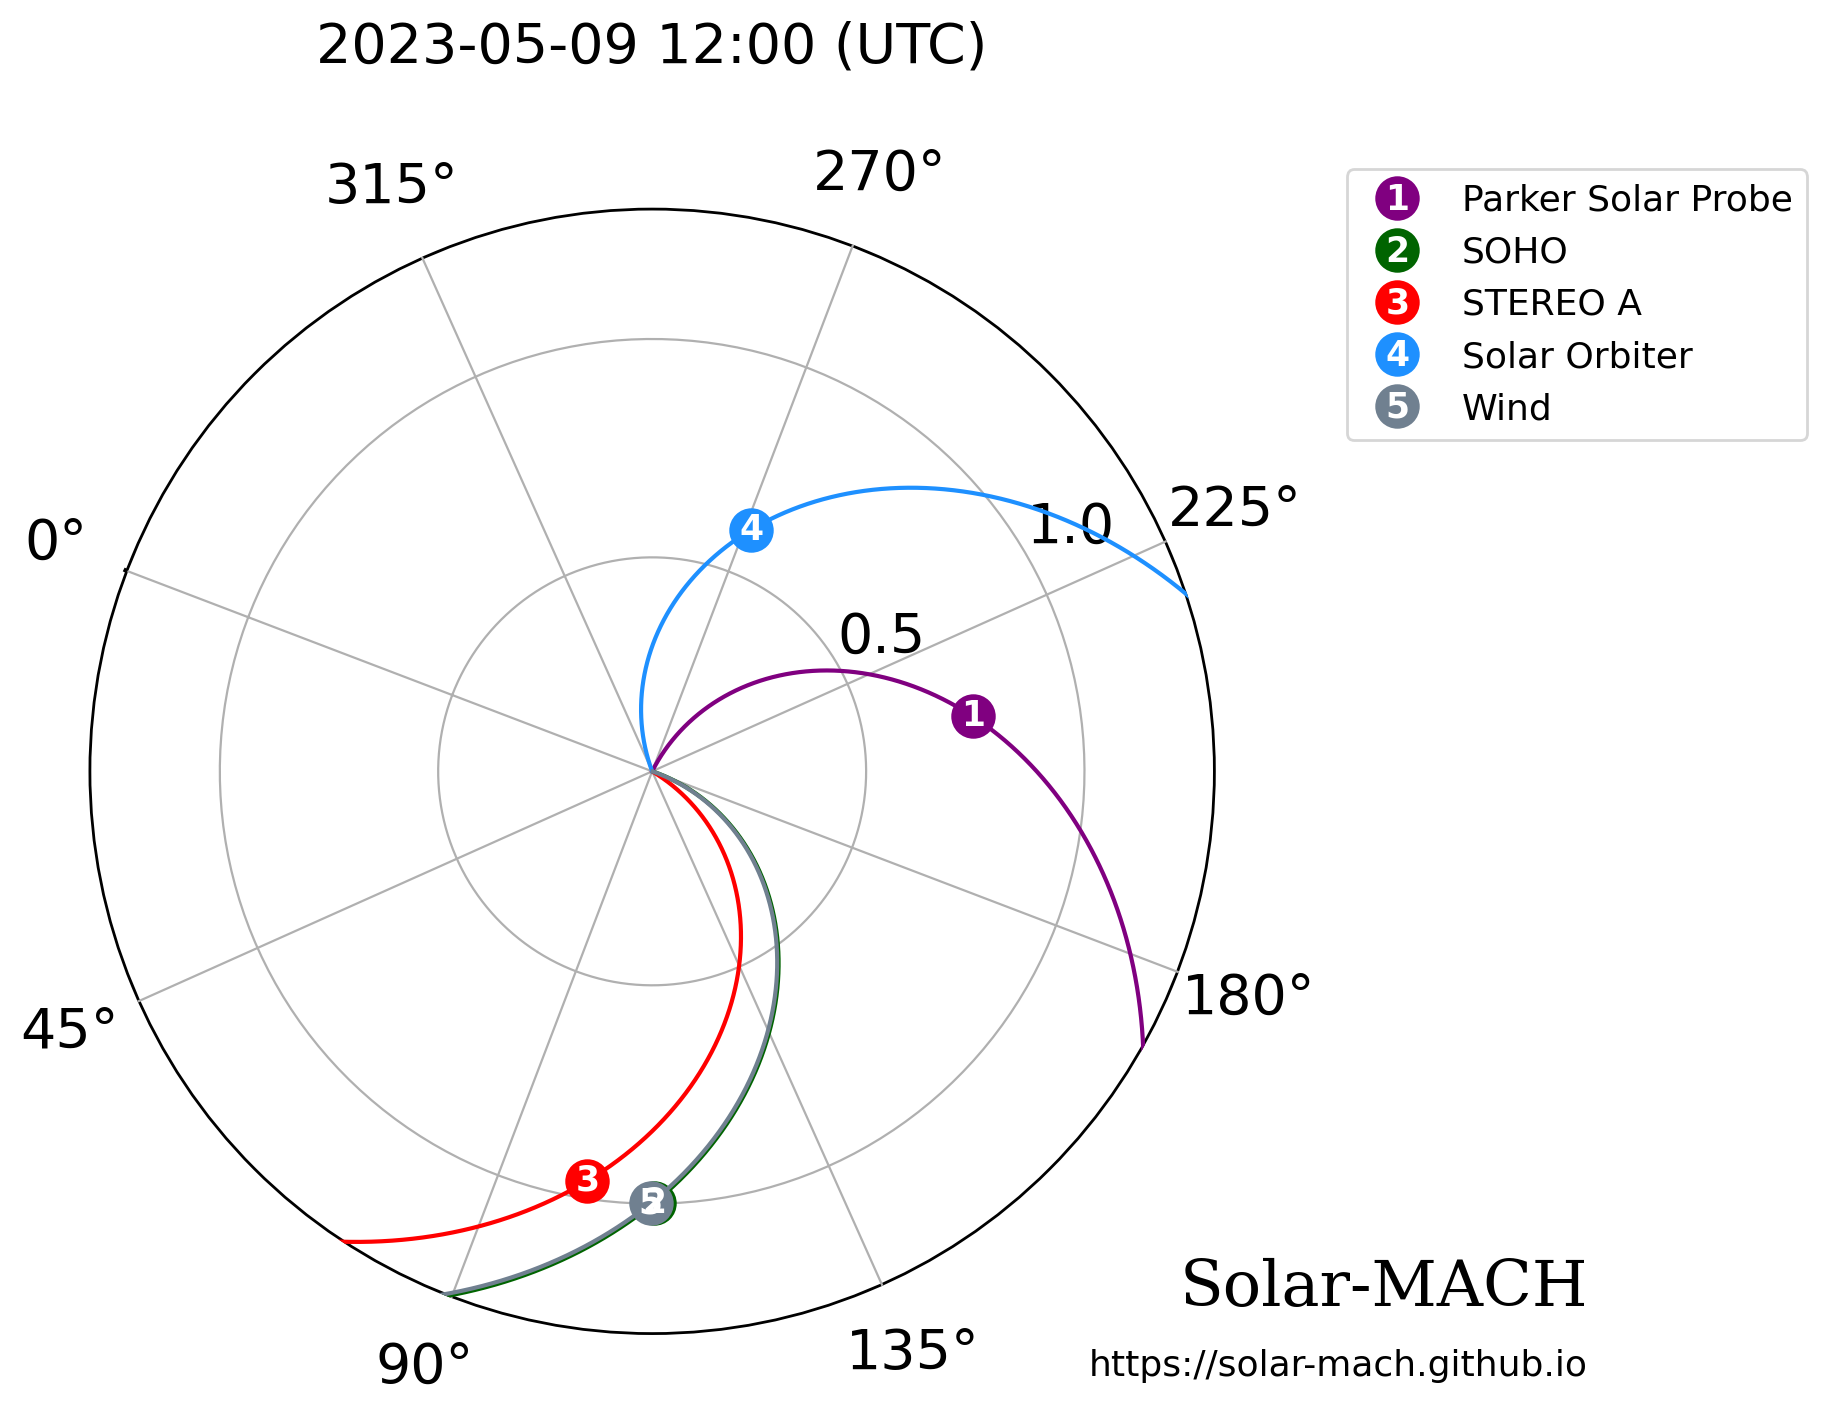

In [ ]:
# make figure for startdate defined above, or define separely
date = startdate  # startdate or or date = dt.datetime(2023, 5, 10, 18, 50) or date = '2023-05-10 18:50:00'

# define position-sensitive solar wind speed per spacecraft, e.g., vsw_list = [400, 400, 400, 400, 400, 400, 400],
# [350]*len(E.spacecraft) creates a list with 350 for each spacecraft.
# or leave empty to let solarmach try to automatically obtain measured solar wind speeds from each spacecraft
vsw_list = [350]*len(E.spacecraft) 

# initialize
sm = SolarMACH(date, E.spacecraft, vsw_list, coord_sys='Carrington')

# make plot
sm.plot(markers='numbers')

In [ ]:
# obtain data as Pandas DataFrame
display(sm.coord_table)

,Spacecraft/Body,Carrington longitude (°),Carrington latitude (°),Heliocentric distance (AU),Longitudinal separation to Earth's longitude,Latitudinal separation to Earth's latitude,Vsw,Magnetic footpoint longitude (Carrington)
0,Parker Solar Probe,210.626438,3.692653,0.756182,99.740589,7.027815,350,264.379015
1,SOHO,111.142966,-3.313011,0.999957,0.257117,0.022151,350,182.371618
2,STEREO-A,101.901778,-4.291314,0.962116,-8.984071,-0.956152,350,170.314060
3,Solar Orbiter,268.592555,7.892384,0.613877,157.706707,11.227546,350,311.717955
4,WIND,110.689465,-3.371420,1.000656,-0.196384,-0.036258,350,181.962243


---

## Data details

The following data sets are used in this tool. If not stated otherwise, they are CDF files obtained from CDAWeb:

- BepiColombo/SIXS-P Level 3 2-minute cruise data ([Info](https://doi.org/10.5281/zenodo.13692883)) <a name="cite_ref-0"></a>[[1]](#cite_note-0)
- Parker Solar Probe ISOIS EPI-Hi Level 2 HET 1-minute Rates ([Info](https://cdaweb.gsfc.nasa.gov/misc/NotesP.html#PSP_ISOIS-EPIHI_L2-HET-RATES60))
- Parker Solar Probe ISOIS EPI-Lo Level 2 Particle Energy mode ([Info](https://cdaweb.gsfc.nasa.gov/misc/NotesP.html#PSP_ISOIS-EPILO_L2-PE))
- SOHO COSTEP-EPHIN Level 2 intensity 1-minute data ([Info](https://www.ieap.uni-kiel.de/et/ag-heber/costep/data.php)) <a name="cite_ref-1"></a>[[2]](#cite_note-1)
- SOHO ERNE-HED Level 2 1-minute data ([Info](https://cdaweb.gsfc.nasa.gov/misc/NotesS.html#SOHO_ERNE-HED_L2-1MIN))
- Solar Orbiter EPD EPT Level 3 data ([Info](http://espada.uah.es/epd/EPD_data_overview.php)) <a name="cite_ref-2"></a>[[3]](#cite_note-2)
- Solar Orbiter EPD HET Level 2 data ([Info](http://espada.uah.es/epd/EPD_data_overview.php)) <a name="cite_ref-2"></a>[[3]](#cite_note-2)
- STEREO Ahead IMPACT/HET Level 1 data ([Info](https://cdaweb.gsfc.nasa.gov/misc/NotesS.html#STA_L1_HET)) 
- STEREO Ahead IMPACT/SEPT Level 2 data ([Info 1](http://www2.physik.uni-kiel.de/STEREO/data/sept/level2/about.txt), [Info 2](http://www2.physik.uni-kiel.de/STEREO/data/sept/level2/SEPT_L2_description.pdf)) <a name="cite_ref-3"></a>[[4]](#cite_note-3)
- Wind/3DP SST Electron omnidirectional fluxes 27 keV - 520 keV, often at 24 sec ([Info](https://cdaweb.gsfc.nasa.gov/misc/NotesW.html#WI_SFSP_3DP))
- Wind/3DP SST Proton omnidirectional fluxes 70 keV - 6.8 MeV, often at 24 sec ([Info](https://cdaweb.gsfc.nasa.gov/misc/NotesW.html#WI_SOSP_3DP))

<a name="cite_note-0"></a>1. [^](#cite_ref-0) BepiColombo/SIXS-P Level 3 cruise data is directly obtained through CSV files from the [server of the SERPENTINE project](https://data.serpentine-h2020.eu/l3data/bepi/).<br>
<a name="cite_note-1"></a>2. [^](#cite_ref-1) SOHO COSTEP-EPHIN Level 2 intensity 1 minute data is directly obtained through ASCII files from the [server of the instrument team](http://ulysses.physik.uni-kiel.de/costep/level2/).<br>
<a name="cite_note-2"></a>3. [^](#cite_ref-2) All Solar Orbiter is obtained as CDF files from ESA's [Solar Orbiter Archive (SOAR)](http://soar.esac.esa.int/soar)<br>
<a name="cite_note-3"></a>4. [^](#cite_ref-3) STEREO IMPACT/SEPT Level 2 data is directly obtained through ASCII files from the [server of the instrument team](http://www2.physik.uni-kiel.de/STEREO/data/sept/level2/).